In [ ]:
!pip install nltk pandas numpy scikit-learn matplotlib seaborn wordcloud


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
data = pd.read_csv(url, encoding="latin-1")

# Rename columns
data = data[['label', 'tweet']]
data.columns = ['label', 'message']

data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

data['cleaned_message'] = data['message'].apply(clean_text)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_message'], data['label'], test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)



ValueError: Input y contains NaN.

In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


ValueError: Input y contains NaN.

In [ ]:
print(y_train.isnull().sum())  # This should print 0 if there are no NaN values


25569


In [ ]:
y_train = y_train.dropna()
X_train = X_train.loc[y_train.index]  # Ensure X_train and y_train match in length



In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)



ValueError: Found input variables with inconsistent numbers of samples: [25569, 0]

In [ ]:
print(data.isnull().sum())  # Check if any column has NaN values


label              31962
message                0
cleaned_message        0
dtype: int64


In [ ]:
data = data.dropna(subset=['label'])  # Remove rows where 'label' is NaN


In [ ]:
print(data.isnull().sum())  # This should now show label = 0


label              0
message            0
cleaned_message    0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_message'], data['label'], test_size=0.2, random_state=42
)



ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_message'], data['label'], test_size=0.2, random_state=42
)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print(f"Total rows before cleaning: {data.shape[0]}")


Total rows before cleaning: 0


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv', sep='\t', header=None, names=['label', 'message'])


In [ ]:
print(data.head())  # Check if data is loaded correctly
print(data.isnull().sum())  # Check for missing values




  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label      0
message    0
dtype: int64


In [ ]:
data.dropna(subset=['label'], inplace=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label'], test_size=0.2, random_state=42
)



In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the dataset (updated working link)
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv',
                   sep='\t', header=None, names=['label', 'message'])

# Check for missing values
print(data.isnull().sum())

# Convert labels to binary
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Drop NaN values if any exist
data.dropna(subset=['label'], inplace=True)



label      0
message    0
dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

data['cleaned_message'] = data['message'].apply(clean_text)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['cleaned_message'], data['label'], test_size=0.2, random_state=42
)


In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)



MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_vec)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



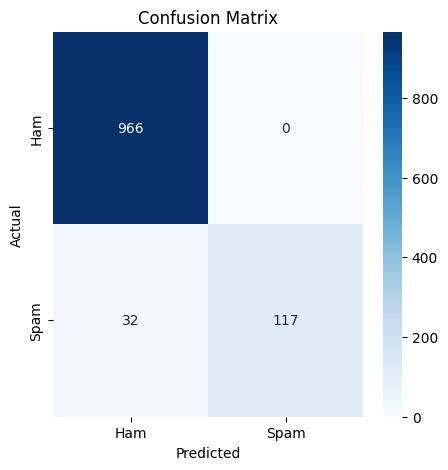

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle
pickle.dump(model, open('spam_model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

print('Model saved as spam_model.pkl')
print('Vectorizer saved as vectorizer.pkl')


Model saved as spam_model.pkl
Vectorizer saved as vectorizer.pkl


In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!git config --global user.name "ARYAKRI"
!git config --global user.email "aryakumarinad@gmail.com"


In [ ]:
!git clone  https://github.com/ARYAKRI/Email_Spam_Detection.git

Cloning into 'Email_Spam_Detection'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
import shutil

# Define paths
model_path = "/content/spam_model.pkl"
vectorizer_path = "/content/vectorizer.pkl"
notebook_path = "/content/YourNotebook.ipynb"

# Move files to repo folder
shutil.move(model_path, "/content/YourRepository/spam_model.pkl")
shutil.move(vectorizer_path, "/content/YourRepository/vectorizer.pkl")
shutil.move(notebook_path, "/content/YourRepository/YourNotebook.ipynb")

print("Files moved to GitHub repo folder!")


FileNotFoundError: [Errno 2] No such file or directory: '/content/YourRepository/spam_model.pkl'

In [ ]:
import os
import shutil

# Define paths
repo_folder = "/content/Email_Spam_Detection"  # Your GitHub repo folder
model_path = "/content/spam_model.pkl"
vectorizer_path = "/content/vectorizer.pkl"
notebook_path = "/content/YourNotebook.ipynb"  # Replace with your actual notebook filename

# Create repo folder if it doesn't exist
if not os.path.exists(repo_folder):
    os.makedirs(repo_folder)

# Move files to the repo folder (only if they exist)
if os.path.exists(model_path):
    shutil.move(model_path, f"{repo_folder}/spam_model.pkl")
else:
    print("⚠️ Model file not found!")

if os.path.exists(vectorizer_path):
    shutil.move(vectorizer_path, f"{repo_folder}/vectorizer.pkl")
else:
    print("⚠️ Vectorizer file not found!")

if os.path.exists(notebook_path):
    shutil.move(notebook_path, f"{repo_folder}/YourNotebook.ipynb")
else:
    print("⚠️ Notebook file not found!")

print("✅ Files moved to GitHub repo folder!")


⚠️ Notebook file not found!
✅ Files moved to GitHub repo folder!


In [ ]:
!ls /content


Email_Spam_Detection  sample_data


In [ ]:
!ls /content/Email_Spam_Detection


README.md  spam_model.pkl  vectorizer.pkl


In [ ]:
!ls /content/sample_data


anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [ ]:
import shutil

notebook_name = "your_notebook_name.ipynb"  # Change this if needed
src_path = f"/content/sample_data/{notebook_name}"
dst_path = f"/content/Email_Spam_Detection/{notebook_name}"

shutil.move(src_path, dst_path)
print("✅ Notebook file moved successfully!")


FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/your_notebook_name.ipynb'

In [ ]:
!find /content -name "*.ipynb"



In [ ]:
!find /content -name "*.ipynb"


In [ ]:
!find /content -name "*.ipynb"


In [ ]:
!find /content -name "*.ipynb"


In [ ]:
!find /content -name "*.ipynb"


In [ ]:
!ls -la /content


total 16
drwxr-xr-x 1 root root 4096 Mar 31 13:40 .
drwxr-xr-x 1 root root 4096 Apr  2 12:42 ..
drwxr-xr-x 4 root root 4096 Mar 31 13:40 .config
drwxr-xr-x 1 root root 4096 Mar 31 13:41 sample_data


In [ ]:
!find / -name "*.ipynb" 2>/dev/null


/root/.julia/packages/GR/WSEqS/examples/covid19.ipynb
/root/.julia/packages/GR/WSEqS/examples/faster-time-to-first-plot.ipynb
/root/.julia/packages/GR/WSEqS/examples/anim.ipynb
/root/.julia/packages/GR/WSEqS/examples/clifford_attractor.ipynb
/root/.julia/packages/GR/WSEqS/examples/line_plot.ipynb
/root/.julia/packages/Interpolations/91PhN/doc/Plotting examples.ipynb
/root/.julia/packages/Interpolations/91PhN/doc/Interpolations.jl.ipynb
/usr/local/lib/python3.11/dist-packages/notebook/bundler/tests/resources/empty.ipynb
/usr/local/lib/python3.11/dist-packages/panel/tests/ui/io/app.ipynb
/usr/local/lib/python3.11/dist-packages/nbclassic/bundler/tests/resources/empty.ipynb
/usr/local/lib/python3.11/dist-packages/wasabi/tests/test-data/wasabi-test-notebook.ipynb
/usr/local/lib/python3.11/dist-packages/cuml/experimental/hyperparams/HPO_demo.ipynb
/usr/local/lib/python3.11/dist-packages/flax/core/flax_functional_engine.ipynb
/usr/local/lib/python3.11/dist-packages/holoviews/examples/user_gui